# KPIs


In [30]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

* ### KPI: Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

Importamos los datos del csv `Penetracion_internet.csv` y eliminamos la columna accesos por 100 habitantes.

In [31]:
accesos = pd.read_csv("../Datasets/Cleans/Penetracion_internet.csv")
df_hogares = accesos.drop("Accesos_100_hab", axis=1)
df_hogares

,Año,Trimestre,Provincia,Accesos_100_hogares
0,2023,4,Buenos Aires,80.960000
1,2023,4,Capital Federal,117.020000
2,2023,4,Catamarca,68.630000
3,2023,4,Chaco,44.350000
4,2023,4,Chubut,84.960000
...,...,...,...,...
955,2014,1,Santa Cruz,28.939093
956,2014,1,Santa Fe,47.847663
957,2014,1,Santiago Del Estero,16.309924
958,2014,1,Tierra Del Fuego,63.965926


### Realizamos el calculo del KPI. 

El Calculo del KPI es el valor de la variable `Accesos_100_hogares` multiplicado por la variable por el porcentaje que queremos aumentar, como en este caso queremos aumentar el 2% multicamos el valor de cada columna por (1 + 0.02) y este nos dara su valor aumentado. Luego se crea una columna llamada `KPI_hogares_2%`.

In [32]:

df_hogares["KPI_hogares_2%"] = df_hogares["Accesos_100_hogares"] * (1 + 0.02)
df_hogares

,Año,Trimestre,Provincia,Accesos_100_hogares,KPI_hogares_2%
0,2023,4,Buenos Aires,80.960000,82.579200
1,2023,4,Capital Federal,117.020000,119.360400
2,2023,4,Catamarca,68.630000,70.002600
3,2023,4,Chaco,44.350000,45.237000
4,2023,4,Chubut,84.960000,86.659200
...,...,...,...,...,...
955,2014,1,Santa Cruz,28.939093,29.517875
956,2014,1,Santa Fe,47.847663,48.804616
957,2014,1,Santiago Del Estero,16.309924,16.636122
958,2014,1,Tierra Del Fuego,63.965926,65.245244


### Graficamos el KPI

Haremos un grafico de barras de la variable `KPI_hogares_2%` y `Accesos_100_hogares` para comparar el crecimiento con los datos actuales.

Agrupamos por `Provincia` y calculamos el promedio de `KPI_hogares_2%` y `Accesos_100_hogares`
Ordenamos por `KPI_hogares_2%` de forma descendiente.
Graficamos los valores de `KPI_hogares_2%` y `Accesos_100_hogares`, con las etiquetas de provincia de forma vertical

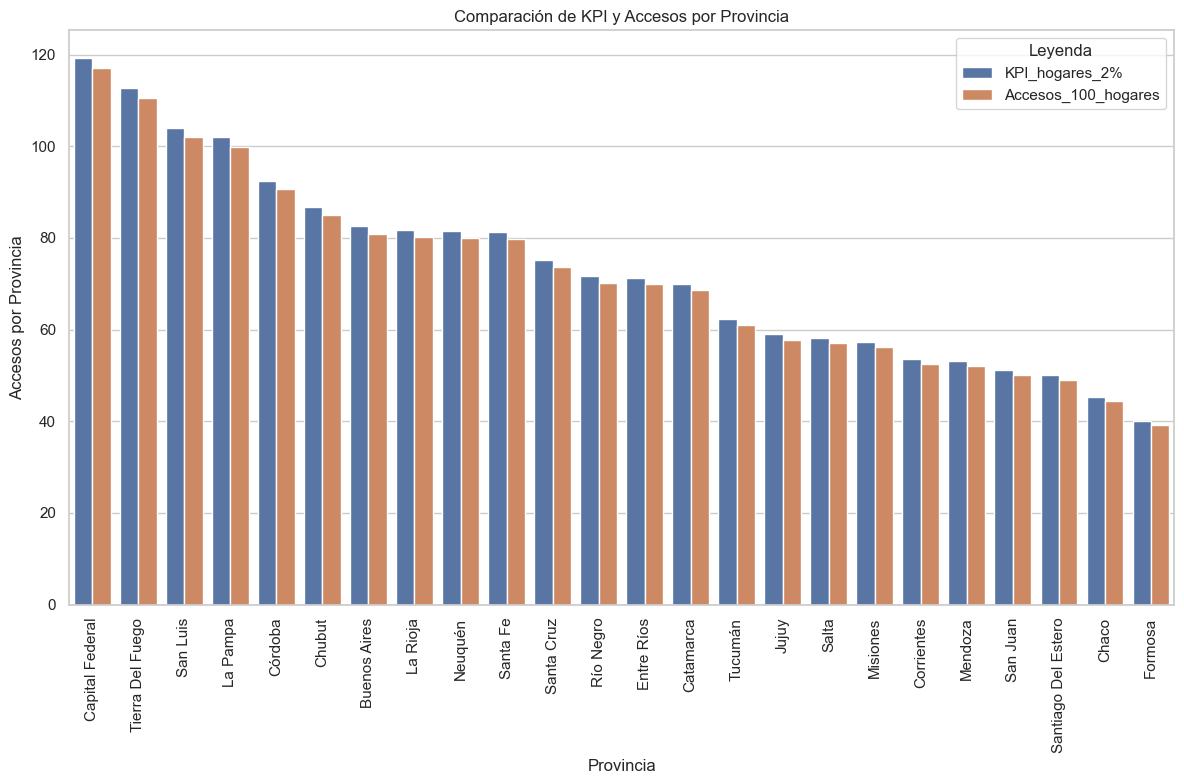

In [43]:
sns.set(style="whitegrid")

data = df_hogares.groupby('Provincia').agg({'Accesos_100_hogares': 'first', 'KPI_hogares_2%': 'first'}).reset_index()
data.sort_values(by='KPI_hogares_2%', ascending=False, inplace=True)

data = data[["Provincia", "KPI_hogares_2%","Accesos_100_hogares" ]]


plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='valor', hue='tipo', data=data.melt(id_vars='Provincia', var_name='tipo', value_name='valor'))

plt.xlabel('Provincia')
plt.ylabel('Accesos por Provincia')
plt.title('Comparación de KPI y Accesos por Provincia')
plt.legend(title='Leyenda')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* ### KPI: Aumentar en un 10% el acceso al servicio de internet por fibra optica por cada provincia.

Importamos el dataset `Accesos_tecnologia.csv` limpio y eliminamos las columnas que no nos interesan.

In [34]:
tecnologia = pd.read_csv("../Datasets/Cleans/Accesos_tecnologia.csv")
tecnologia
df_fibra = tecnologia.drop(["ADSL", "Cablemodem", "Wireless", "Otros", "Total"], axis=1)
df_fibra

,Año,Trimestre,Provincia,Fibra_optica
0,2023,4,Buenos Aires,1784593.0
1,2023,4,Capital Federal,182520.0
2,2023,4,Catamarca,55437.0
3,2023,4,Chaco,62301.0
4,2023,4,Chubut,26174.0
...,...,...,...,...
955,2014,1,Santa Cruz,381.0
956,2014,1,Santa Fe,3059.0
957,2014,1,Santiago Del Estero,19.0
958,2014,1,Tierra Del Fuego,648.0


### Realizamos el calculo del KPI.

Como queremos aumentar el acceso por fibra optica en un 10%, multiplicamos el valor de cada columna por (1 + 0.1) y este nos dara su valor aumentado. Luego se crea una columna llamada `KPI_fibra_10%`.

In [35]:
df_fibra["KPI_fibra_10%"] = df_fibra["Fibra_optica"] * (1 + (15/100))
df_fibra

,Año,Trimestre,Provincia,Fibra_optica,KPI_fibra_10%
0,2023,4,Buenos Aires,1784593.0,2052281.95
1,2023,4,Capital Federal,182520.0,209898.00
2,2023,4,Catamarca,55437.0,63752.55
3,2023,4,Chaco,62301.0,71646.15
4,2023,4,Chubut,26174.0,30100.10
...,...,...,...,...,...
955,2014,1,Santa Cruz,381.0,438.15
956,2014,1,Santa Fe,3059.0,3517.85
957,2014,1,Santiago Del Estero,19.0,21.85
958,2014,1,Tierra Del Fuego,648.0,745.20


### Graficamos el KPI

Haremos un grafico de barras de la variable `KPI_fibra_10%` y `Fibra_optica` para comparar el crecimiento con los datos actuales.

Agrupamos por `Provincia` y calculamos el promedio de `KPI_fibra_10%` y `Fibra_optica`
Ordenamos por `KPI_fibra_10%` de forma descendiente.
Graficamos los valores de `KPI_fibra_10%` y `Fibra_optica`, con provincia con las etiquetas de forma vertical

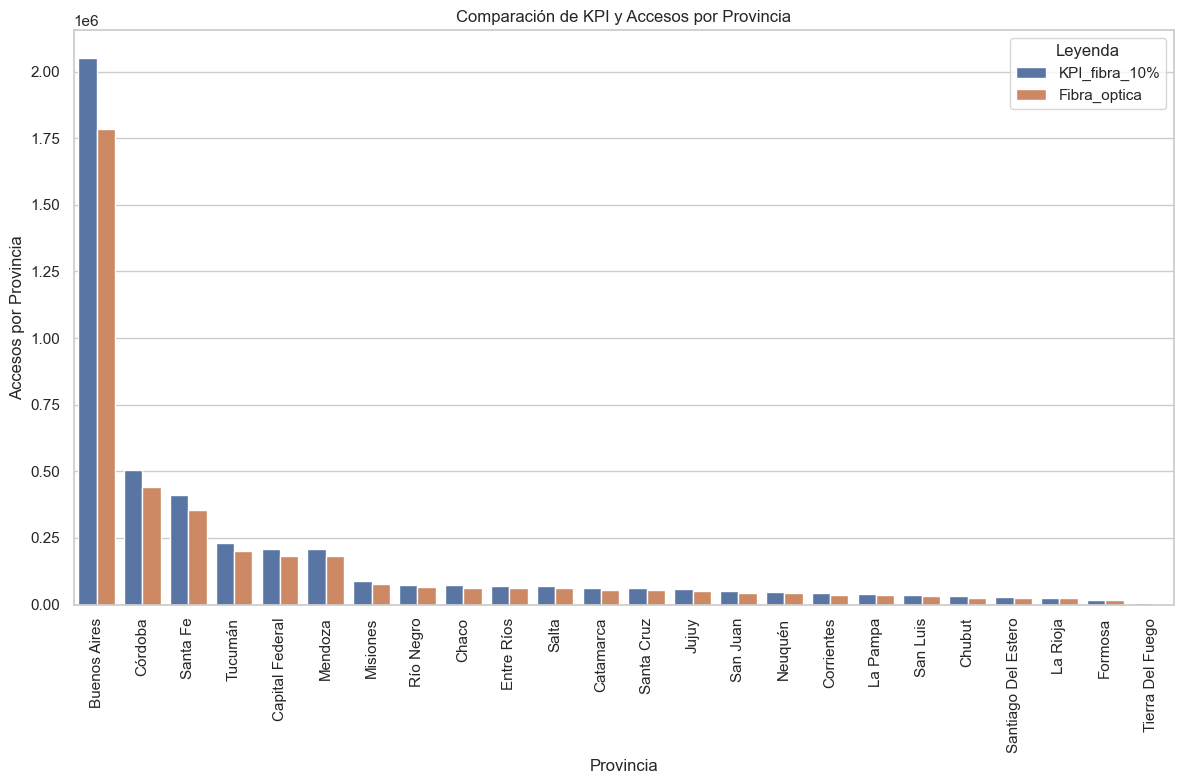

In [44]:
sns.set(style="whitegrid")
data = df_fibra.groupby('Provincia').agg({'Fibra_optica': 'first', 'KPI_fibra_10%': 'first'}).reset_index()
data.sort_values(by='KPI_fibra_10%', ascending=False, inplace=True)

data = data[["Provincia", "KPI_fibra_10%","Fibra_optica" ]]

plt.figure(figsize=(12, 8))

# Usar Seaborn para graficar las barras
sns.barplot(x='Provincia', y='valor', hue='tipo', data=data.melt(id_vars='Provincia', var_name='tipo', value_name='valor'))

plt.xlabel('Provincia')
plt.ylabel('Accesos por Provincia')
plt.title('Comparación de KPI y Accesos por Provincia')

plt.legend(title='Leyenda')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Guardamos los datos

In [42]:
tecnologia.drop("Fibra_optica", axis=1, inplace=True)
accesos.drop("Accesos_100_hogares", axis = 1, inplace=True)
df_kpi = pd.merge(df_hogares, df_fibra, on=["Año", "Trimestre", "Provincia"])
df_kpi2 = pd.merge(accesos, tecnologia, on = ["Año", "Trimestre", "Provincia"])
df_dashboard = pd.merge(df_kpi,df_kpi2, on= ["Año", "Trimestre", "Provincia"])
df_dashboard.to_csv("../Datasets/Cleans/dashboard.csv", index=False)